In [51]:
###############################################################
##### Reference:
        #  UWMGI: Mask Data: https://www.kaggle.com/code/awsaf49/uwmgi-mask-data
        #  UWMGI: 2.5D stride=2 Data: https://www.kaggle.com/code/awsaf49/uwmgi-2-5d-stride-2-data
###############################################################

# part1: Data Description
In this competition we are segmenting organs cells in images. The training annotations are provided as ***RLE-encoded masks***, and the images are in ***16-bit grayscale PNG format***.     

Each case in this competition is represented by multiple sets of scan slices (each set is identified by the day the scan took place). Some cases are split by time (early days are in train, later days are in test) while some cases are split by case - the entirety of the case is in train or test. The goal of this competition is to be able to generalize to both partially and wholly unseen cases.     

Note that, in this case, the test set is entirely unseen. It is roughly 50 cases, with a varying number of days and slices, as seen in the training set.            

eg:     
--uw-madison-gi-tract-image-segmentation/case2    
&nbsp;&nbsp;--case2_day1/scans    
&nbsp;&nbsp;&nbsp;&nbsp;--slice_0001_266_266_1.50_1.50.png      
&nbsp;&nbsp;&nbsp;&nbsp;--slice_0002_266_266_1.50_1.50.png      
&nbsp;&nbsp;&nbsp;&nbsp;--slice_0003_266_266_1.50_1.50.png      
&nbsp;&nbsp;--case2_day2       
&nbsp;&nbsp;--case2_day3            

# part2: Data Preprocess
  
***Pandas Document: https://pandas.pydata.org/docs/reference/frame.html***    

In [6]:
from glob import glob
##### API: glob.glob(pathname, *, root_dir=None, dir_fd=None, recursive=False)
##### Describe: finds all the pathnames matching a specified pattern according to the rules used by the Unix shell.
##### Document: https://docs.python.org/zh-cn/3/library/glob.html
# glob('../input/uwmgi-25d-stride2-dataset/images/images/*')

In [16]:
import pandas as pd

path_df = pd.DataFrame(glob('../input/uwmgi-25d-stride2-dataset/images/images/*'), columns=['image_path'])
display(path_df) # dataframe: 2D: index + value + column.
display(path_df.columns) 
display(path_df.image_path) # series: 1D: index + value.
display(path_df.image_path[0])

,image_path
0,../input/uwmgi-25d-stride2-dataset/images/imag...
1,../input/uwmgi-25d-stride2-dataset/images/imag...
2,../input/uwmgi-25d-stride2-dataset/images/imag...
3,../input/uwmgi-25d-stride2-dataset/images/imag...
4,../input/uwmgi-25d-stride2-dataset/images/imag...
...,...
38491,../input/uwmgi-25d-stride2-dataset/images/imag...
38492,../input/uwmgi-25d-stride2-dataset/images/imag...
38493,../input/uwmgi-25d-stride2-dataset/images/imag...
38494,../input/uwmgi-25d-stride2-dataset/images/imag...


Index(['image_path'], dtype='object')

0        ../input/uwmgi-25d-stride2-dataset/images/imag...
1        ../input/uwmgi-25d-stride2-dataset/images/imag...
2        ../input/uwmgi-25d-stride2-dataset/images/imag...
3        ../input/uwmgi-25d-stride2-dataset/images/imag...
4        ../input/uwmgi-25d-stride2-dataset/images/imag...
                               ...                        
38491    ../input/uwmgi-25d-stride2-dataset/images/imag...
38492    ../input/uwmgi-25d-stride2-dataset/images/imag...
38493    ../input/uwmgi-25d-stride2-dataset/images/imag...
38494    ../input/uwmgi-25d-stride2-dataset/images/imag...
38495    ../input/uwmgi-25d-stride2-dataset/images/imag...
Name: image_path, Length: 38496, dtype: object

'../input/uwmgi-25d-stride2-dataset/images/images/case30_day1_slice_0019.npy'

In [17]:
##### Vectorized string functions for Series and Index.
path_df['mask_path'] = path_df.image_path.str.replace('image','mask')
display(path_df)

,image_path,mask_path
0,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
1,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
2,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
3,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
4,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
...,...,...
38491,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38492,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38493,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38494,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...


In [19]:
##### Map values of Series according to an input mapping or function.   
path_df['id'] = path_df.image_path.map(lambda x: x.split('/')[-1].replace('.npy',''))
display(path_df)


,image_path,mask_path,id
0,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case30_day1_slice_0019
1,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case6_day20_slice_0023
2,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case156_day0_slice_0073
3,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case47_day0_slice_0124
4,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case146_day0_slice_0129
...,...,...,...
38491,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case122_day24_slice_0127
38492,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case24_day25_slice_0124
38493,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case89_day20_slice_0092
38494,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,case144_day15_slice_0094


In [20]:
df = pd.read_csv('../input/uwmgi-mask-dataset/train.csv')
display(df)

,id,class,segmentation,case,day,slice,image_path,height,width,mask_path
0,case123_day20_slice_0001,large_bowel,NaN,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
1,case123_day20_slice_0001,small_bowel,NaN,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
2,case123_day20_slice_0001,stomach,NaN,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
3,case123_day20_slice_0002,large_bowel,NaN,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
4,case123_day20_slice_0002,small_bowel,NaN,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
...,...,...,...,...,...,...,...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
115484,case30_day0_slice_0143,stomach,NaN,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
115485,case30_day0_slice_0144,large_bowel,NaN,30,0,144,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
115486,case30_day0_slice_0144,small_bowel,NaN,30,0,144,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...


In [21]:
##### Fill NA/NaN values using the specified method
df['segmentation'] = df.segmentation.fillna('')
df['rle_len'] = df.segmentation.map(len)
display(df)

,id,class,segmentation,case,day,slice,image_path,height,width,mask_path,rle_len
0,case123_day20_slice_0001,large_bowel,,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
1,case123_day20_slice_0001,small_bowel,,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
2,case123_day20_slice_0001,stomach,,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
3,case123_day20_slice_0002,large_bowel,,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
4,case123_day20_slice_0002,small_bowel,,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
...,...,...,...,...,...,...,...,...,...,...,...
115483,case30_day0_slice_0143,small_bowel,,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
115484,case30_day0_slice_0143,stomach,,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
115485,case30_day0_slice_0144,large_bowel,,30,0,144,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0
115486,case30_day0_slice_0144,small_bowel,,30,0,144,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,0


In [27]:
##### Aggregate using one or more operations over the specified axis.
df.groupby(['id'])['segmentation'].agg(list)

id
case101_day20_slice_0001    [, , ]
case101_day20_slice_0002    [, , ]
case101_day20_slice_0003    [, , ]
case101_day20_slice_0004    [, , ]
case101_day20_slice_0005    [, , ]
                             ...  
case9_day22_slice_0140      [, , ]
case9_day22_slice_0141      [, , ]
case9_day22_slice_0142      [, , ]
case9_day22_slice_0143      [, , ]
case9_day22_slice_0144      [, , ]
Name: segmentation, Length: 38496, dtype: object

In [31]:
##### Convert Series to DataFrame.
##### Generate a new DataFrame or Series with the index reset.

display(df.groupby(['id'])['segmentation'].agg(list).to_frame())
display(df.groupby(['id'])['segmentation'].agg(list).to_frame().reset_index())
# remove original index
display(df.groupby(['id'])['segmentation'].agg(list).to_frame().reset_index(drop=True))

,segmentation
id,
case101_day20_slice_0001,"[, , ]"
case101_day20_slice_0002,"[, , ]"
case101_day20_slice_0003,"[, , ]"
case101_day20_slice_0004,"[, , ]"
case101_day20_slice_0005,"[, , ]"
...,...
case9_day22_slice_0140,"[, , ]"
case9_day22_slice_0141,"[, , ]"
case9_day22_slice_0142,"[, , ]"


,id,segmentation
0,case101_day20_slice_0001,"[, , ]"
1,case101_day20_slice_0002,"[, , ]"
2,case101_day20_slice_0003,"[, , ]"
3,case101_day20_slice_0004,"[, , ]"
4,case101_day20_slice_0005,"[, , ]"
...,...,...
38491,case9_day22_slice_0140,"[, , ]"
38492,case9_day22_slice_0141,"[, , ]"
38493,case9_day22_slice_0142,"[, , ]"
38494,case9_day22_slice_0143,"[, , ]"


,segmentation
0,"[, , ]"
1,"[, , ]"
2,"[, , ]"
3,"[, , ]"
4,"[, , ]"
...,...
38491,"[, , ]"
38492,"[, , ]"
38493,"[, , ]"
38494,"[, , ]"


In [32]:
df2 = df.groupby(['id'])['segmentation'].agg(list).to_frame().reset_index()
display(df2)

,id,segmentation
0,case101_day20_slice_0001,"[, , ]"
1,case101_day20_slice_0002,"[, , ]"
2,case101_day20_slice_0003,"[, , ]"
3,case101_day20_slice_0004,"[, , ]"
4,case101_day20_slice_0005,"[, , ]"
...,...,...
38491,case9_day22_slice_0140,"[, , ]"
38492,case9_day22_slice_0141,"[, , ]"
38493,case9_day22_slice_0142,"[, , ]"
38494,case9_day22_slice_0143,"[, , ]"


In [34]:
display(df.groupby(['id'])['rle_len'].agg(sum).to_frame().reset_index())

,id,rle_len
0,case101_day20_slice_0001,0
1,case101_day20_slice_0002,0
2,case101_day20_slice_0003,0
3,case101_day20_slice_0004,0
4,case101_day20_slice_0005,0
...,...,...
38491,case9_day22_slice_0140,0
38492,case9_day22_slice_0141,0
38493,case9_day22_slice_0142,0
38494,case9_day22_slice_0143,0


In [35]:

##### Merge DataFrame or named Series objects with a database-style join.

df2 = df2.merge(df.groupby(['id'])['rle_len'].agg(sum).to_frame().reset_index())
display(df2)

,id,segmentation,rle_len
0,case101_day20_slice_0001,"[, , ]",0
1,case101_day20_slice_0002,"[, , ]",0
2,case101_day20_slice_0003,"[, , ]",0
3,case101_day20_slice_0004,"[, , ]",0
4,case101_day20_slice_0005,"[, , ]",0
...,...,...,...
38491,case9_day22_slice_0140,"[, , ]",0
38492,case9_day22_slice_0141,"[, , ]",0
38493,case9_day22_slice_0142,"[, , ]",0
38494,case9_day22_slice_0143,"[, , ]",0


In [37]:

##### Drop specified labels from rows or columns.
df = df.drop(columns=['segmentation', 'class', 'rle_len'])
display(df)

,id,case,day,slice,image_path,height,width,mask_path
0,case123_day20_slice_0001,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
1,case123_day20_slice_0001,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
2,case123_day20_slice_0001,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
3,case123_day20_slice_0002,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
4,case123_day20_slice_0002,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
...,...,...,...,...,...,...,...,...
115483,case30_day0_slice_0143,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
115484,case30_day0_slice_0143,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
115485,case30_day0_slice_0144,30,0,144,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
115486,case30_day0_slice_0144,30,0,144,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...


In [38]:

##### Return the first n rows.
df = df.groupby(['id']).head(1).reset_index(drop=True)
display(df)

,id,case,day,slice,image_path,height,width,mask_path
0,case123_day20_slice_0001,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
1,case123_day20_slice_0002,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
2,case123_day20_slice_0003,123,20,3,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
3,case123_day20_slice_0004,123,20,4,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
4,case123_day20_slice_0005,123,20,5,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,30,0,140,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
38492,case30_day0_slice_0141,30,0,141,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
38493,case30_day0_slice_0142,30,0,142,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...
38494,case30_day0_slice_0143,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...


In [39]:
df = df.merge(df2, on=['id'])
display(df)

,id,case,day,slice,image_path,height,width,mask_path,segmentation,rle_len
0,case123_day20_slice_0001,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
1,case123_day20_slice_0002,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
2,case123_day20_slice_0003,123,20,3,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
3,case123_day20_slice_0004,123,20,4,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
4,case123_day20_slice_0005,123,20,5,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,30,0,140,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
38492,case30_day0_slice_0141,30,0,141,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
38493,case30_day0_slice_0142,30,0,142,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0
38494,case30_day0_slice_0143,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0


In [42]:
df['empty'] = (df.rle_len==0)
display(df)

,id,case,day,slice,image_path,height,width,mask_path,segmentation,rle_len,empty
0,case123_day20_slice_0001,123,20,1,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
1,case123_day20_slice_0002,123,20,2,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
2,case123_day20_slice_0003,123,20,3,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
3,case123_day20_slice_0004,123,20,4,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
4,case123_day20_slice_0005,123,20,5,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
...,...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,30,0,140,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
38492,case30_day0_slice_0141,30,0,141,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
38493,case30_day0_slice_0142,30,0,142,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True
38494,case30_day0_slice_0143,30,0,143,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,/kaggle/input/uwmgi-mask-dataset/png//uw-madis...,"[, , ]",0,True


True     21906
False    16590
Name: empty, dtype: int64

<AxesSubplot:>

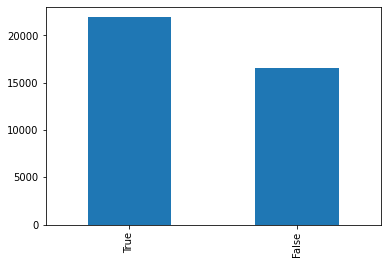

In [43]:

##### Return a Series containing counts of unique rows in the DataFrame.
display(df['empty'].value_counts())
df['empty'].value_counts().plot.bar()

In [44]:
df = df.drop(columns=['image_path','mask_path'])
df = df.merge(path_df, on=['id'])
display(df)

,id,case,day,slice,height,width,segmentation,rle_len,empty,image_path,mask_path
0,case123_day20_slice_0001,123,20,1,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
1,case123_day20_slice_0002,123,20,2,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
2,case123_day20_slice_0003,123,20,3,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
3,case123_day20_slice_0004,123,20,4,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
4,case123_day20_slice_0005,123,20,5,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
...,...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,30,0,140,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38492,case30_day0_slice_0141,30,0,141,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38493,case30_day0_slice_0142,30,0,142,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38494,case30_day0_slice_0143,30,0,143,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...


In [45]:
##### remove incorrect masks
##### Incorrect masks: Ref: https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/discussion/319963
fault1 = 'case7_day0'
fault2 = 'case81_day30'
df = df[~df['id'].str.contains(fault1) & ~df['id'].str.contains(fault2)].reset_index(drop=True)
display(df)

,id,case,day,slice,height,width,segmentation,rle_len,empty,image_path,mask_path
0,case123_day20_slice_0001,123,20,1,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
1,case123_day20_slice_0002,123,20,2,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
2,case123_day20_slice_0003,123,20,3,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
3,case123_day20_slice_0004,123,20,4,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
4,case123_day20_slice_0005,123,20,5,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
...,...,...,...,...,...,...,...,...,...,...,...
38203,case30_day0_slice_0140,30,0,140,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38204,case30_day0_slice_0141,30,0,141,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38205,case30_day0_slice_0142,30,0,142,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...
38206,case30_day0_slice_0143,30,0,143,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...


<AxesSubplot:>

<AxesSubplot:>

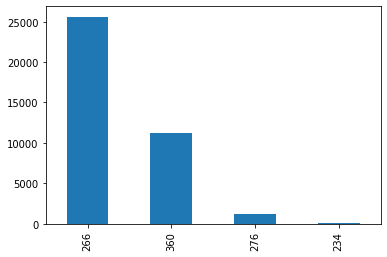

In [49]:
# observed image sizes: 234 ~ 360 
display(df['height'].value_counts().plot.bar())

<AxesSubplot:>

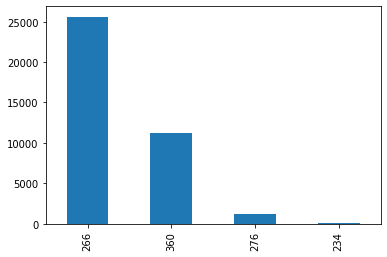

In [50]:
display(df['width'].value_counts().plot.bar())

In [57]:
display(df)

,id,case,day,slice,height,width,segmentation,rle_len,empty,image_path,mask_path,fold
0,case123_day20_slice_0001,123,20,1,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
1,case123_day20_slice_0002,123,20,2,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
2,case123_day20_slice_0003,123,20,3,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
3,case123_day20_slice_0004,123,20,4,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
4,case123_day20_slice_0005,123,20,5,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38203,case30_day0_slice_0140,30,0,140,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0
38204,case30_day0_slice_0141,30,0,141,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0
38205,case30_day0_slice_0142,30,0,142,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0
38206,case30_day0_slice_0143,30,0,143,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0


(38208, 12)


In [58]:
print(df.shape)
print(df['empty'].shape)
print(df['case'].shape)

(38208, 12)
(38208,)
(38208,)


In [65]:
##### pandas.Series.loc¶

display(df.loc[1]) 
display(df.loc[1, 'id']) 
display(df.loc[:, 'id']) 


id                                       case123_day20_slice_0002
case                                                          123
day                                                            20
slice                                                           2
height                                                        266
width                                                         266
segmentation                                               [, , ]
rle_len                                                         0
empty                                                        True
image_path      ../input/uwmgi-25d-stride2-dataset/images/imag...
mask_path       ../input/uwmgi-25d-stride2-dataset/masks/masks...
fold                                                          3.0
Name: 1, dtype: object

'case123_day20_slice_0002'

0        case123_day20_slice_0001
1        case123_day20_slice_0002
2        case123_day20_slice_0003
3        case123_day20_slice_0004
4        case123_day20_slice_0005
                   ...           
38203      case30_day0_slice_0140
38204      case30_day0_slice_0141
38205      case30_day0_slice_0142
38206      case30_day0_slice_0143
38207      case30_day0_slice_0144
Name: id, Length: 38208, dtype: object

In [62]:
from sklearn.model_selection import StratifiedGroupKFold
skf = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X=df, y=df['empty'], groups = df["case"])):
    df.loc[val_idx, 'fold'] = fold
display(df)

,id,case,day,slice,height,width,segmentation,rle_len,empty,image_path,mask_path,fold
0,case123_day20_slice_0001,123,20,1,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
1,case123_day20_slice_0002,123,20,2,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
2,case123_day20_slice_0003,123,20,3,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
3,case123_day20_slice_0004,123,20,4,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
4,case123_day20_slice_0005,123,20,5,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38203,case30_day0_slice_0140,30,0,140,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0
38204,case30_day0_slice_0141,30,0,141,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0
38205,case30_day0_slice_0142,30,0,142,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0
38206,case30_day0_slice_0143,30,0,143,266,266,"[, , ]",0,True,../input/uwmgi-25d-stride2-dataset/images/imag...,../input/uwmgi-25d-stride2-dataset/masks/masks...,0.0
